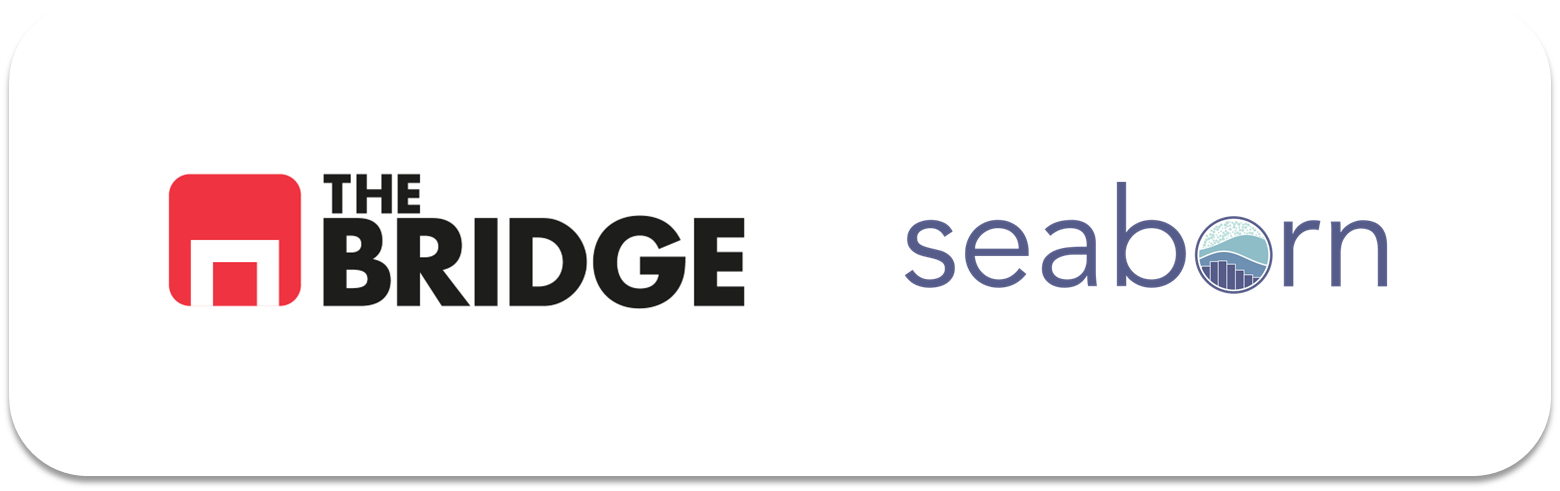

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [68]:
# Cargar el dataset
file_path = "./data/california_cities.csv"
california_cities = pd.read_csv(file_path)

# Eliminar filas con valores nulos
california_cities_cleaned = california_cities.dropna()

# Mostrar el contenido del dataset limpio
print(california_cities_cleaned)


     Unnamed: 0         city       latd       longd  elevation_m  \
0             0     Adelanto  34.576111 -117.432778        875.0   
1             1  AgouraHills  34.153333 -118.761667        281.0   
4             4     Alhambra  34.081944 -118.135000        150.0   
5             5   AlisoViejo  33.575000 -117.725556        127.0   
6             6      Alturas  41.487222 -120.542500       1332.0   
..          ...          ...        ...         ...          ...   
477         477   Yountville  38.403056 -122.362222         30.0   
478         478        Yreka  41.726667 -122.637500        787.0   
479         479     YubaCity  39.134722 -121.626111         18.0   
480         480      Yucaipa  34.030278 -117.048611        798.0   
481         481  YuccaValley  34.133333 -116.416667       1027.0   

     elevation_ft  population_total  area_total_sq_mi  area_land_sq_mi  \
0          2871.0             31765            56.027           56.009   
1           922.0             20330

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [69]:

def scatter_plot(dataframe, col_x, col_y, col_color=None, size_param=None, scale=1, show_legend=True):
    """
    Crea un diagrama de dispersión según los argumentos proporcionados.

    Args:
        dataframe (pd.DataFrame): El dataframe que contiene los datos.
        col_x (str): Nombre de la columna numérica para el eje X.
        col_y (str): Nombre de la columna numérica para el eje Y.
        col_color (str, opcional): Nombre de la columna categórica para el color. Por defecto es None.
        size_param (str o float, opcional): Columna del dataframe o valor constante para los tamaños de los puntos. Por defecto es None.
        scale (float): Factor de escala para ajustar los tamaños si size_param es una columna. Por defecto es 1.
        show_legend (bool): Si True, muestra la leyenda. Si False, muestra una barra de color. Por defecto es True.
    """
    # Manejo del tamaño de los puntos
    if isinstance(size_param, str):  # Si es una columna
        sizes = dataframe[size_param] * scale
    elif size_param is not None:  # Si es un valor constante
        sizes = size_param
    else:  # Si no se da tamaño
        sizes = 50

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    
    if col_color:
        scatter = plt.scatter(
            dataframe[col_x], 
            dataframe[col_y], 
            c=dataframe[col_color].astype('category').cat.codes,  # Convertir categórica a valores numéricos
            s=sizes, 
            cmap='viridis', 
            alpha=0.7
        )
        if show_legend:
            plt.legend(*scatter.legend_elements(), title=col_color)
        else:
            plt.colorbar(scatter, label=col_color)
    else:
        plt.scatter(dataframe[col_x], dataframe[col_y], s=sizes, alpha=0.7)
    
    # Etiquetas y título
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Diagrama de dispersión de {col_x} vs {col_y}')
    plt.show()





In [70]:
print(california_cities_cleaned.columns)

Index(['Unnamed: 0', 'city', 'latd', 'longd', 'elevation_m', 'elevation_ft',
       'population_total', 'area_total_sq_mi', 'area_land_sq_mi',
       'area_water_sq_mi', 'area_total_km2', 'area_land_km2', 'area_water_km2',
       'area_water_percent'],
      dtype='object')


In [71]:
print(california_cities_cleaned.head)

<bound method NDFrame.head of      Unnamed: 0         city       latd       longd  elevation_m  \
0             0     Adelanto  34.576111 -117.432778        875.0   
1             1  AgouraHills  34.153333 -118.761667        281.0   
4             4     Alhambra  34.081944 -118.135000        150.0   
5             5   AlisoViejo  33.575000 -117.725556        127.0   
6             6      Alturas  41.487222 -120.542500       1332.0   
..          ...          ...        ...         ...          ...   
477         477   Yountville  38.403056 -122.362222         30.0   
478         478        Yreka  41.726667 -122.637500        787.0   
479         479     YubaCity  39.134722 -121.626111         18.0   
480         480      Yucaipa  34.030278 -117.048611        798.0   
481         481  YuccaValley  34.133333 -116.416667       1027.0   

     elevation_ft  population_total  area_total_sq_mi  area_land_sq_mi  \
0          2871.0             31765            56.027           56.009   
1    

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

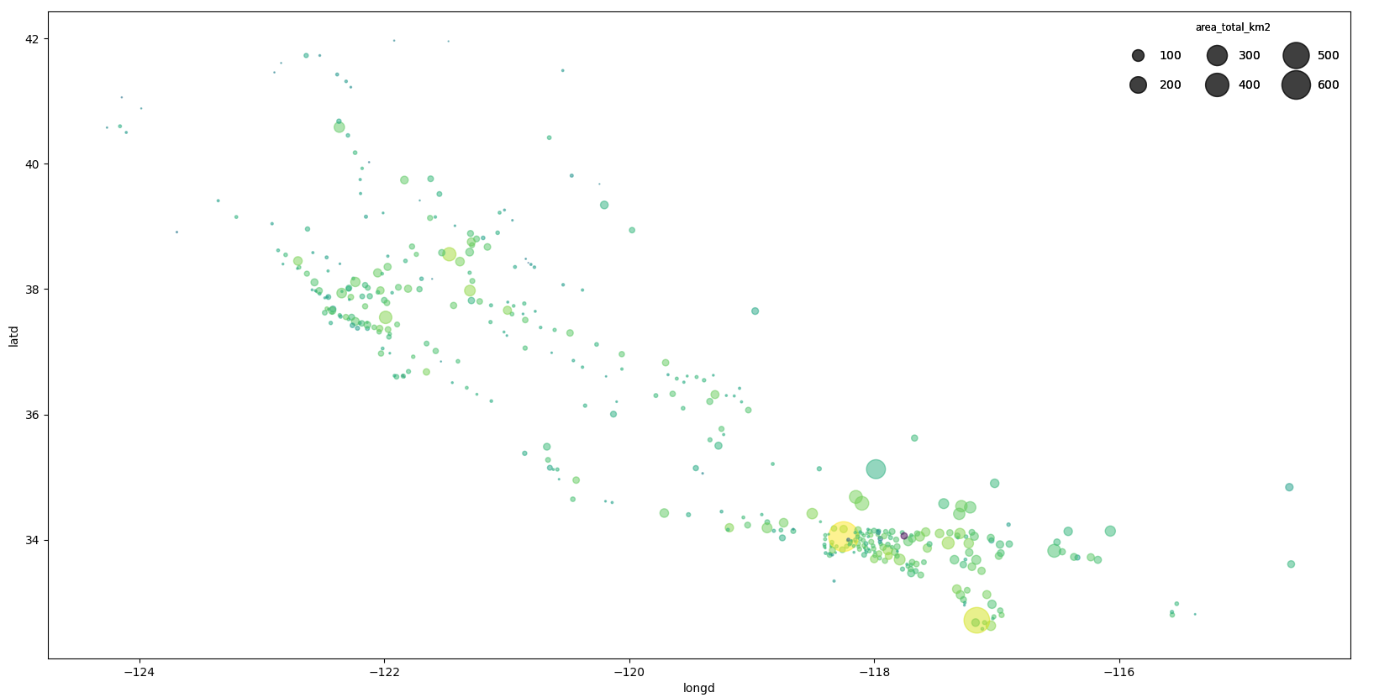

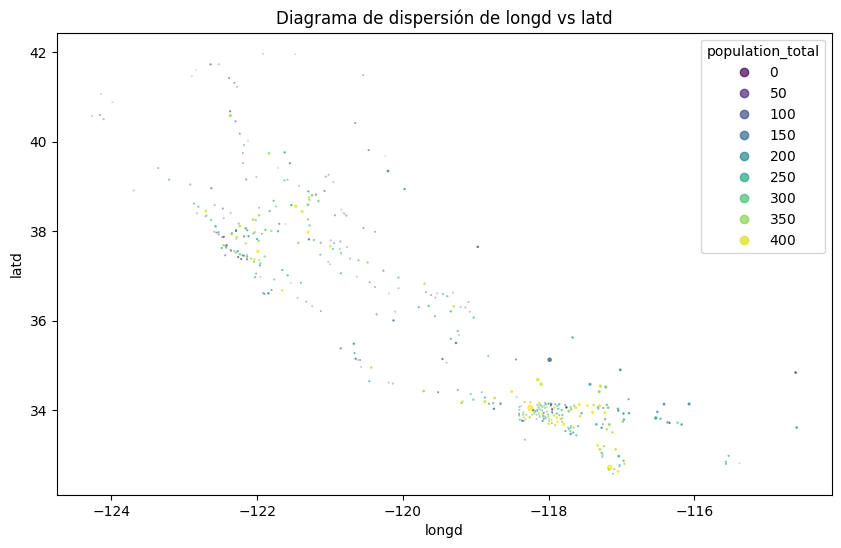

In [72]:
scatter_plot(
    california_cities_cleaned,
    "longd",          # Columna X
    "latd",           # Columna Y
    col_color="population_total",  # Colores
    size_param="area_total_km2", # Tamaño
    scale=1/100,          # Escala para el tamaño
    show_legend=True      # Mostrar leyenda y colorbar
)


## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

C:\Users\javie\AppData\Local\Temp\ipykernel_2548\1880502358.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Survived', palette='coolwarm')


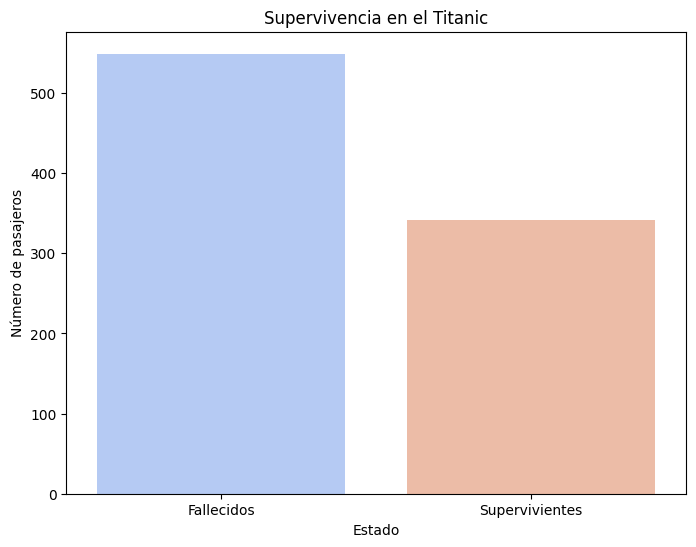

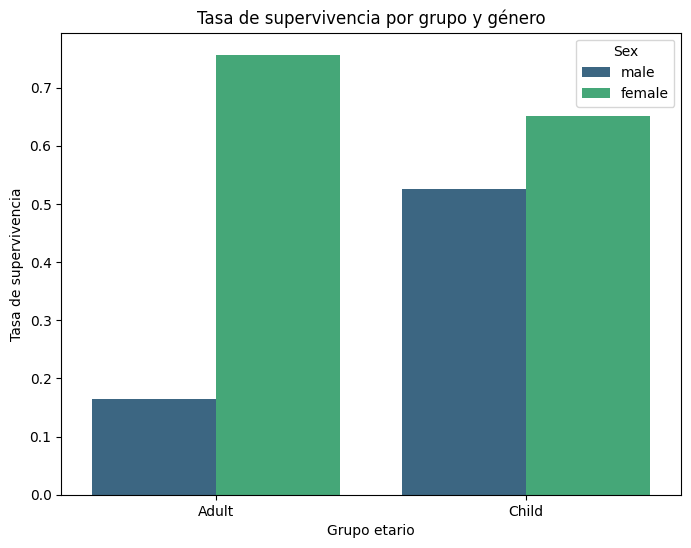

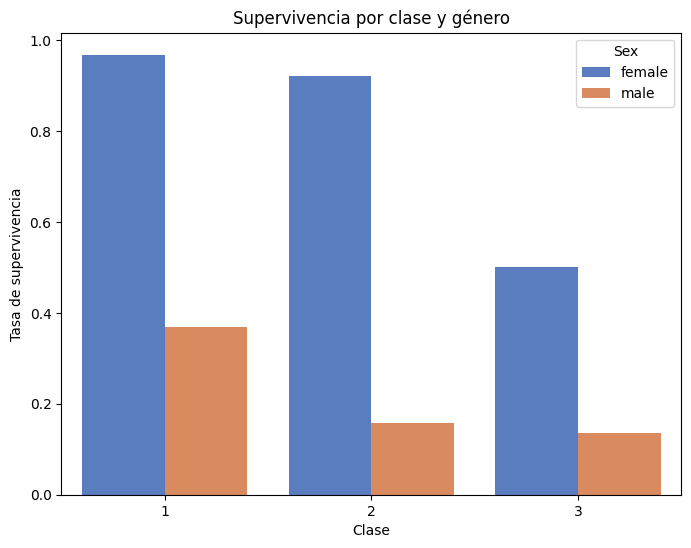

<Figure size 800x600 with 0 Axes>

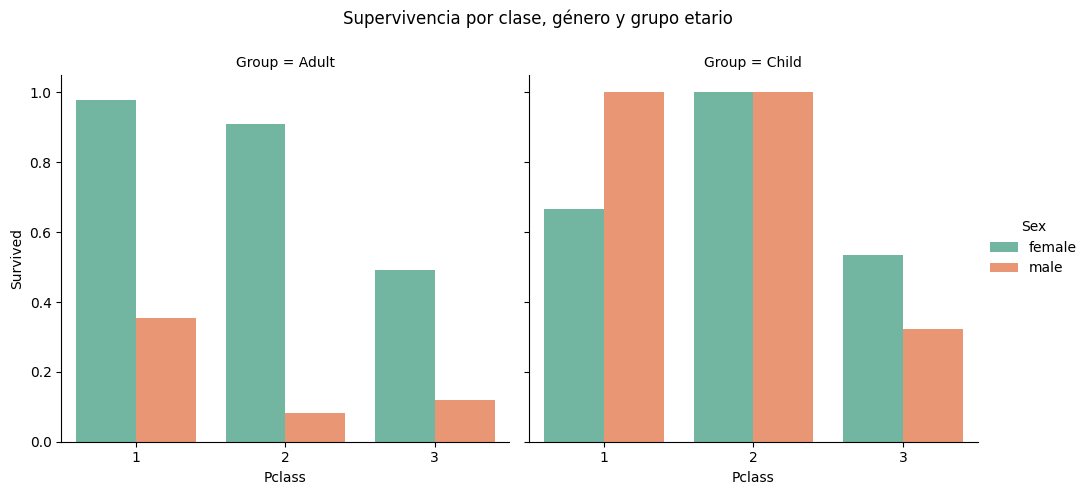

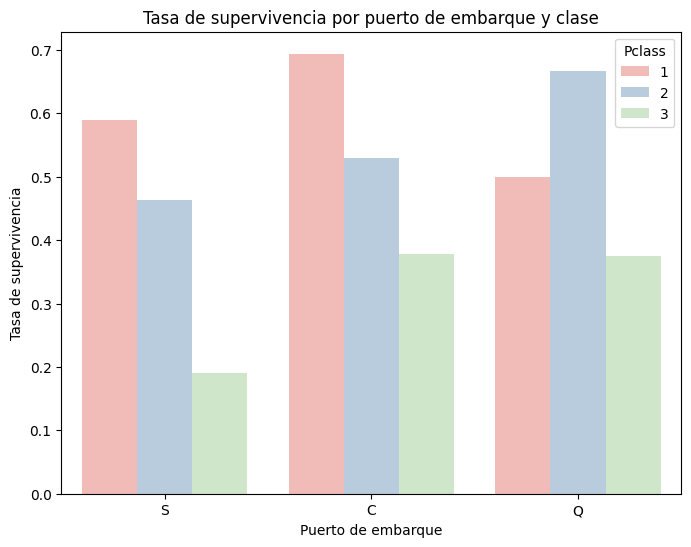

Las gráficas necesarias para la presentación han sido generadas y guardadas como imágenes.


In [73]:
# Cargar el dataset del Titanic
data_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(data_url)

# Limpieza básica
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic['Cabin'] = titanic['Cabin'].fillna('Unknown')


# Crear las gráficas

# Slide 1: Tasa de mortalidad
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='Survived', palette='coolwarm')
plt.title('Supervivencia en el Titanic')
plt.xticks([0, 1], ['Fallecidos', 'Supervivientes'])
plt.ylabel('Número de pasajeros')
plt.xlabel('Estado')
plt.savefig("slide1_mortalidad.png")
plt.show()

# Slide 2: Mujeres y niños primero
plt.figure(figsize=(8, 6))
titanic['Group'] = titanic['Age'].apply(lambda x: 'Child' if x < 16 else 'Adult')
sns.barplot(data=titanic, x='Group', y='Survived', hue='Sex', errorbar=None, palette='viridis')
plt.title('Tasa de supervivencia por grupo y género')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Grupo etario')
plt.savefig("slide2_mujeres_ninos.png")
plt.show()

# Slide 3: Influencia de la clase
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex', errorbar=None, palette='muted')
plt.title('Supervivencia por clase y género')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Clase')
plt.savefig("slide3_clase_genero.png")
plt.show()

# Slide 4: Mujeres y niños por clase
plt.figure(figsize=(8, 6))
sns.catplot(data=titanic, x='Pclass', y='Survived', hue='Sex', col='Group', kind='bar', errorbar=None, palette='Set2', height=5, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Supervivencia por clase, género y grupo etario')
plt.savefig("slide4_clase_grupo.png")
plt.show()

# Slide 5: Puerto de embarque
plt.figure(figsize=(8, 6))
sns.barplot(data=titanic, x='Embarked', y='Survived', hue='Pclass', errorbar=None, palette='Pastel1')
plt.title('Tasa de supervivencia por puerto de embarque y clase')
plt.ylabel('Tasa de supervivencia')
plt.xlabel('Puerto de embarque')
plt.savefig("slide5_puerto.png")
plt.show()

print("Las gráficas necesarias para la presentación han sido generadas y guardadas como imágenes.");
